In [135]:
import pickle
import json

In [ ]:
from collections import defaultdict

In [2]:
with open('viz_data.pkl', 'rb') as f:
    X, Y = pickle.load(f)

In [40]:
classes = defaultdict(list)
for i, y in enumerate(Y):
    tag = y.split('_')[-1][:-1]
    classes[tag].append(i)

In [98]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [42]:
import matplotlib.pyplot as plt

In [78]:
tsne = TSNE(n_components=2, init='random', random_state=0, perplexity=500)
pca = PCA(n_components=2, random_state=0)

X_norm = StandardScaler().fit_transform(X)

X_embedded = tsne.fit_transform(X_norm)
X_embedded = pca.fit_transform(X_norm)

In [104]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_norm)

clusters = kmeans.predict(X_norm)

In [108]:
dist_matr = pairwise_distances(X_norm)

In [129]:
with open('data.pkl', 'rb') as f:
    results = pickle.load(f)

In [132]:
results_new = []
for i, r in enumerate(results):
    r['distances'] = list(dist_matr[i])
    r['cluster'] = int(clusters[i])
    results_new.append(r)

In [136]:
with open('data_final.json', 'w') as f:
    f.write(json.dumps(results_new, indent=2))

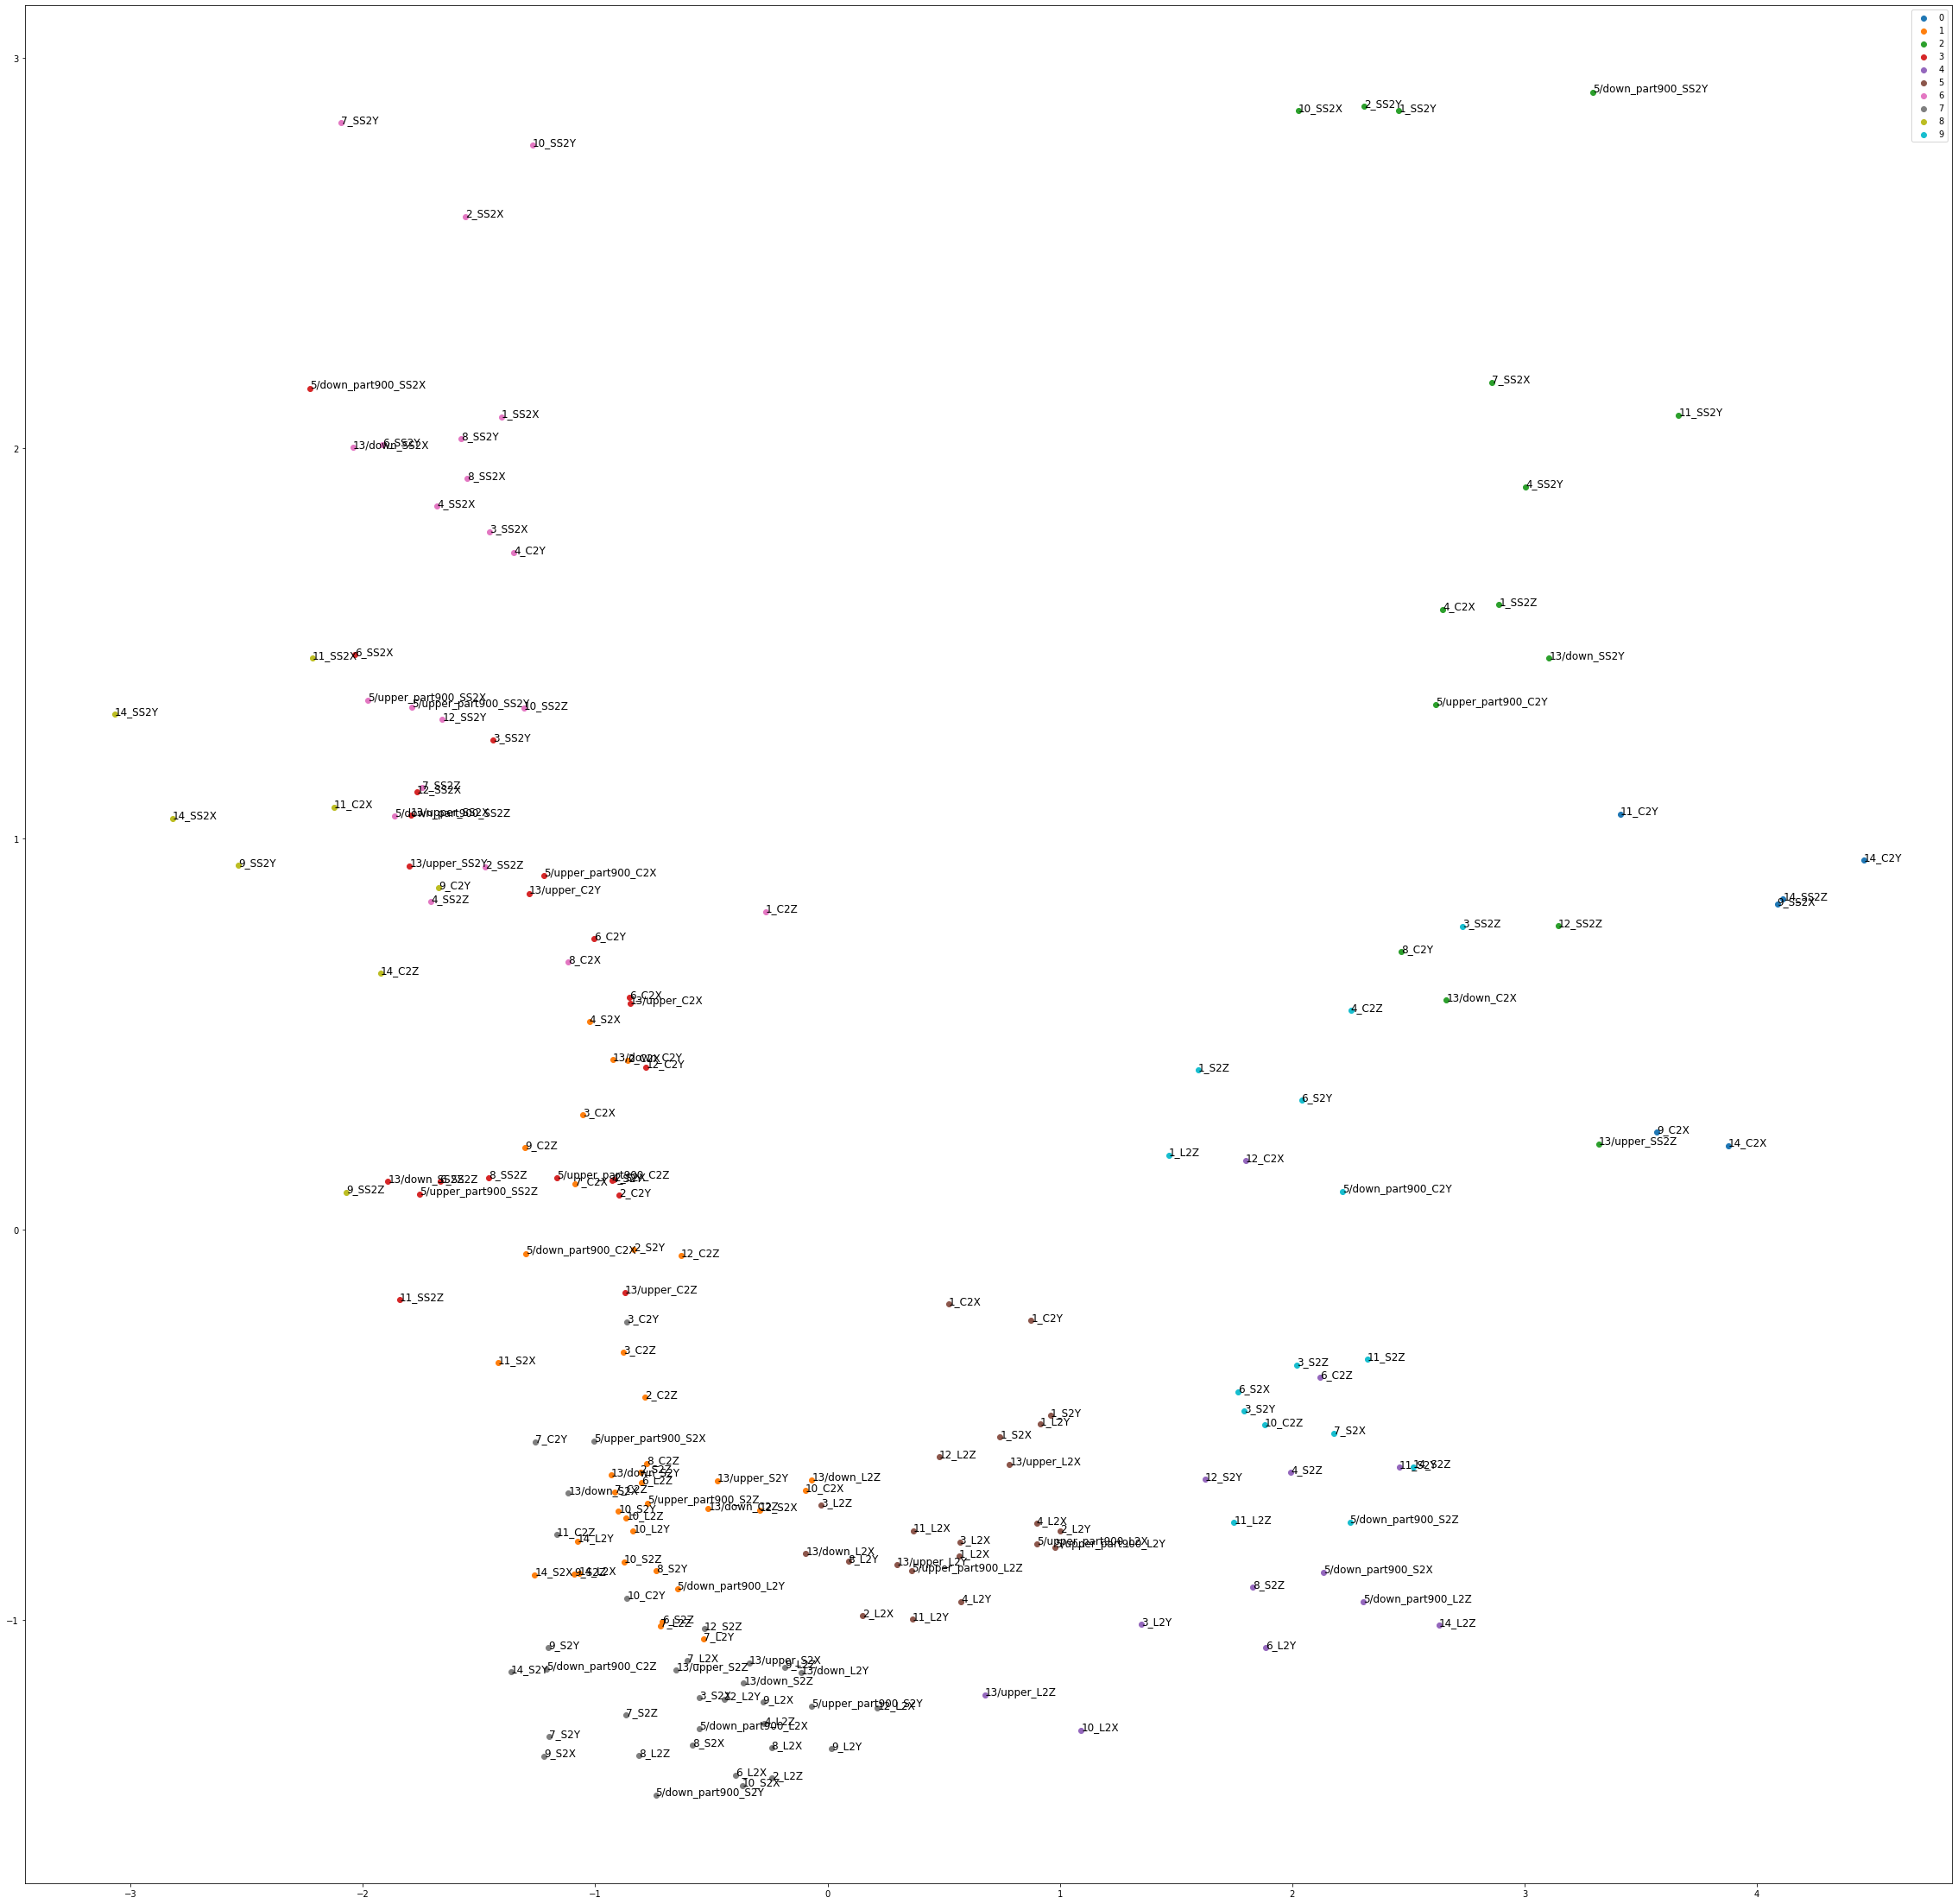

In [120]:
plt.figure(figsize=(40, 40))
for i in range(10):
    idxes,  = np.where(clusters == i)
    plt.scatter(X_embedded[idxes, 0],X_embedded[idxes, 1], label=str(i))
for i, y in enumerate(Y):
    plt.annotate(y, (X_embedded[i, 0], X_embedded[i, 1]), fontsize=12)
plt.legend(loc='best')
plt.savefig('clustering.png')
plt.show()

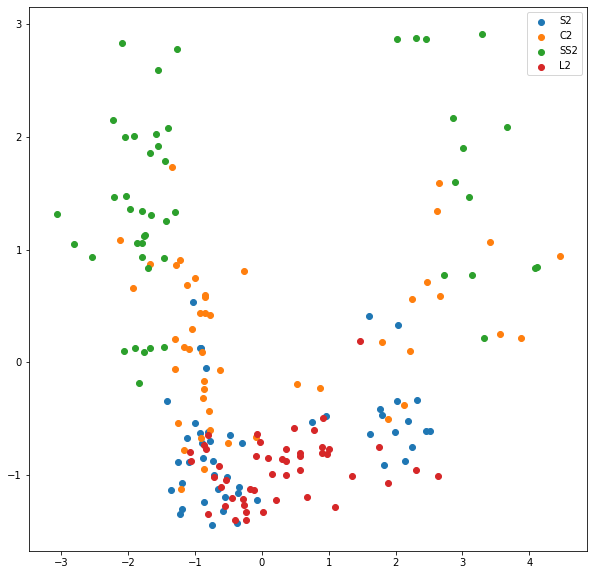

In [121]:
plt.figure(figsize=(10, 10))
for cls, idxes in classes.items():
    plt.scatter(X_embedded[idxes, 0], X_embedded[idxes, 1], label=cls)
plt.legend(loc='best')
plt.savefig('func_small.png')
plt.show()

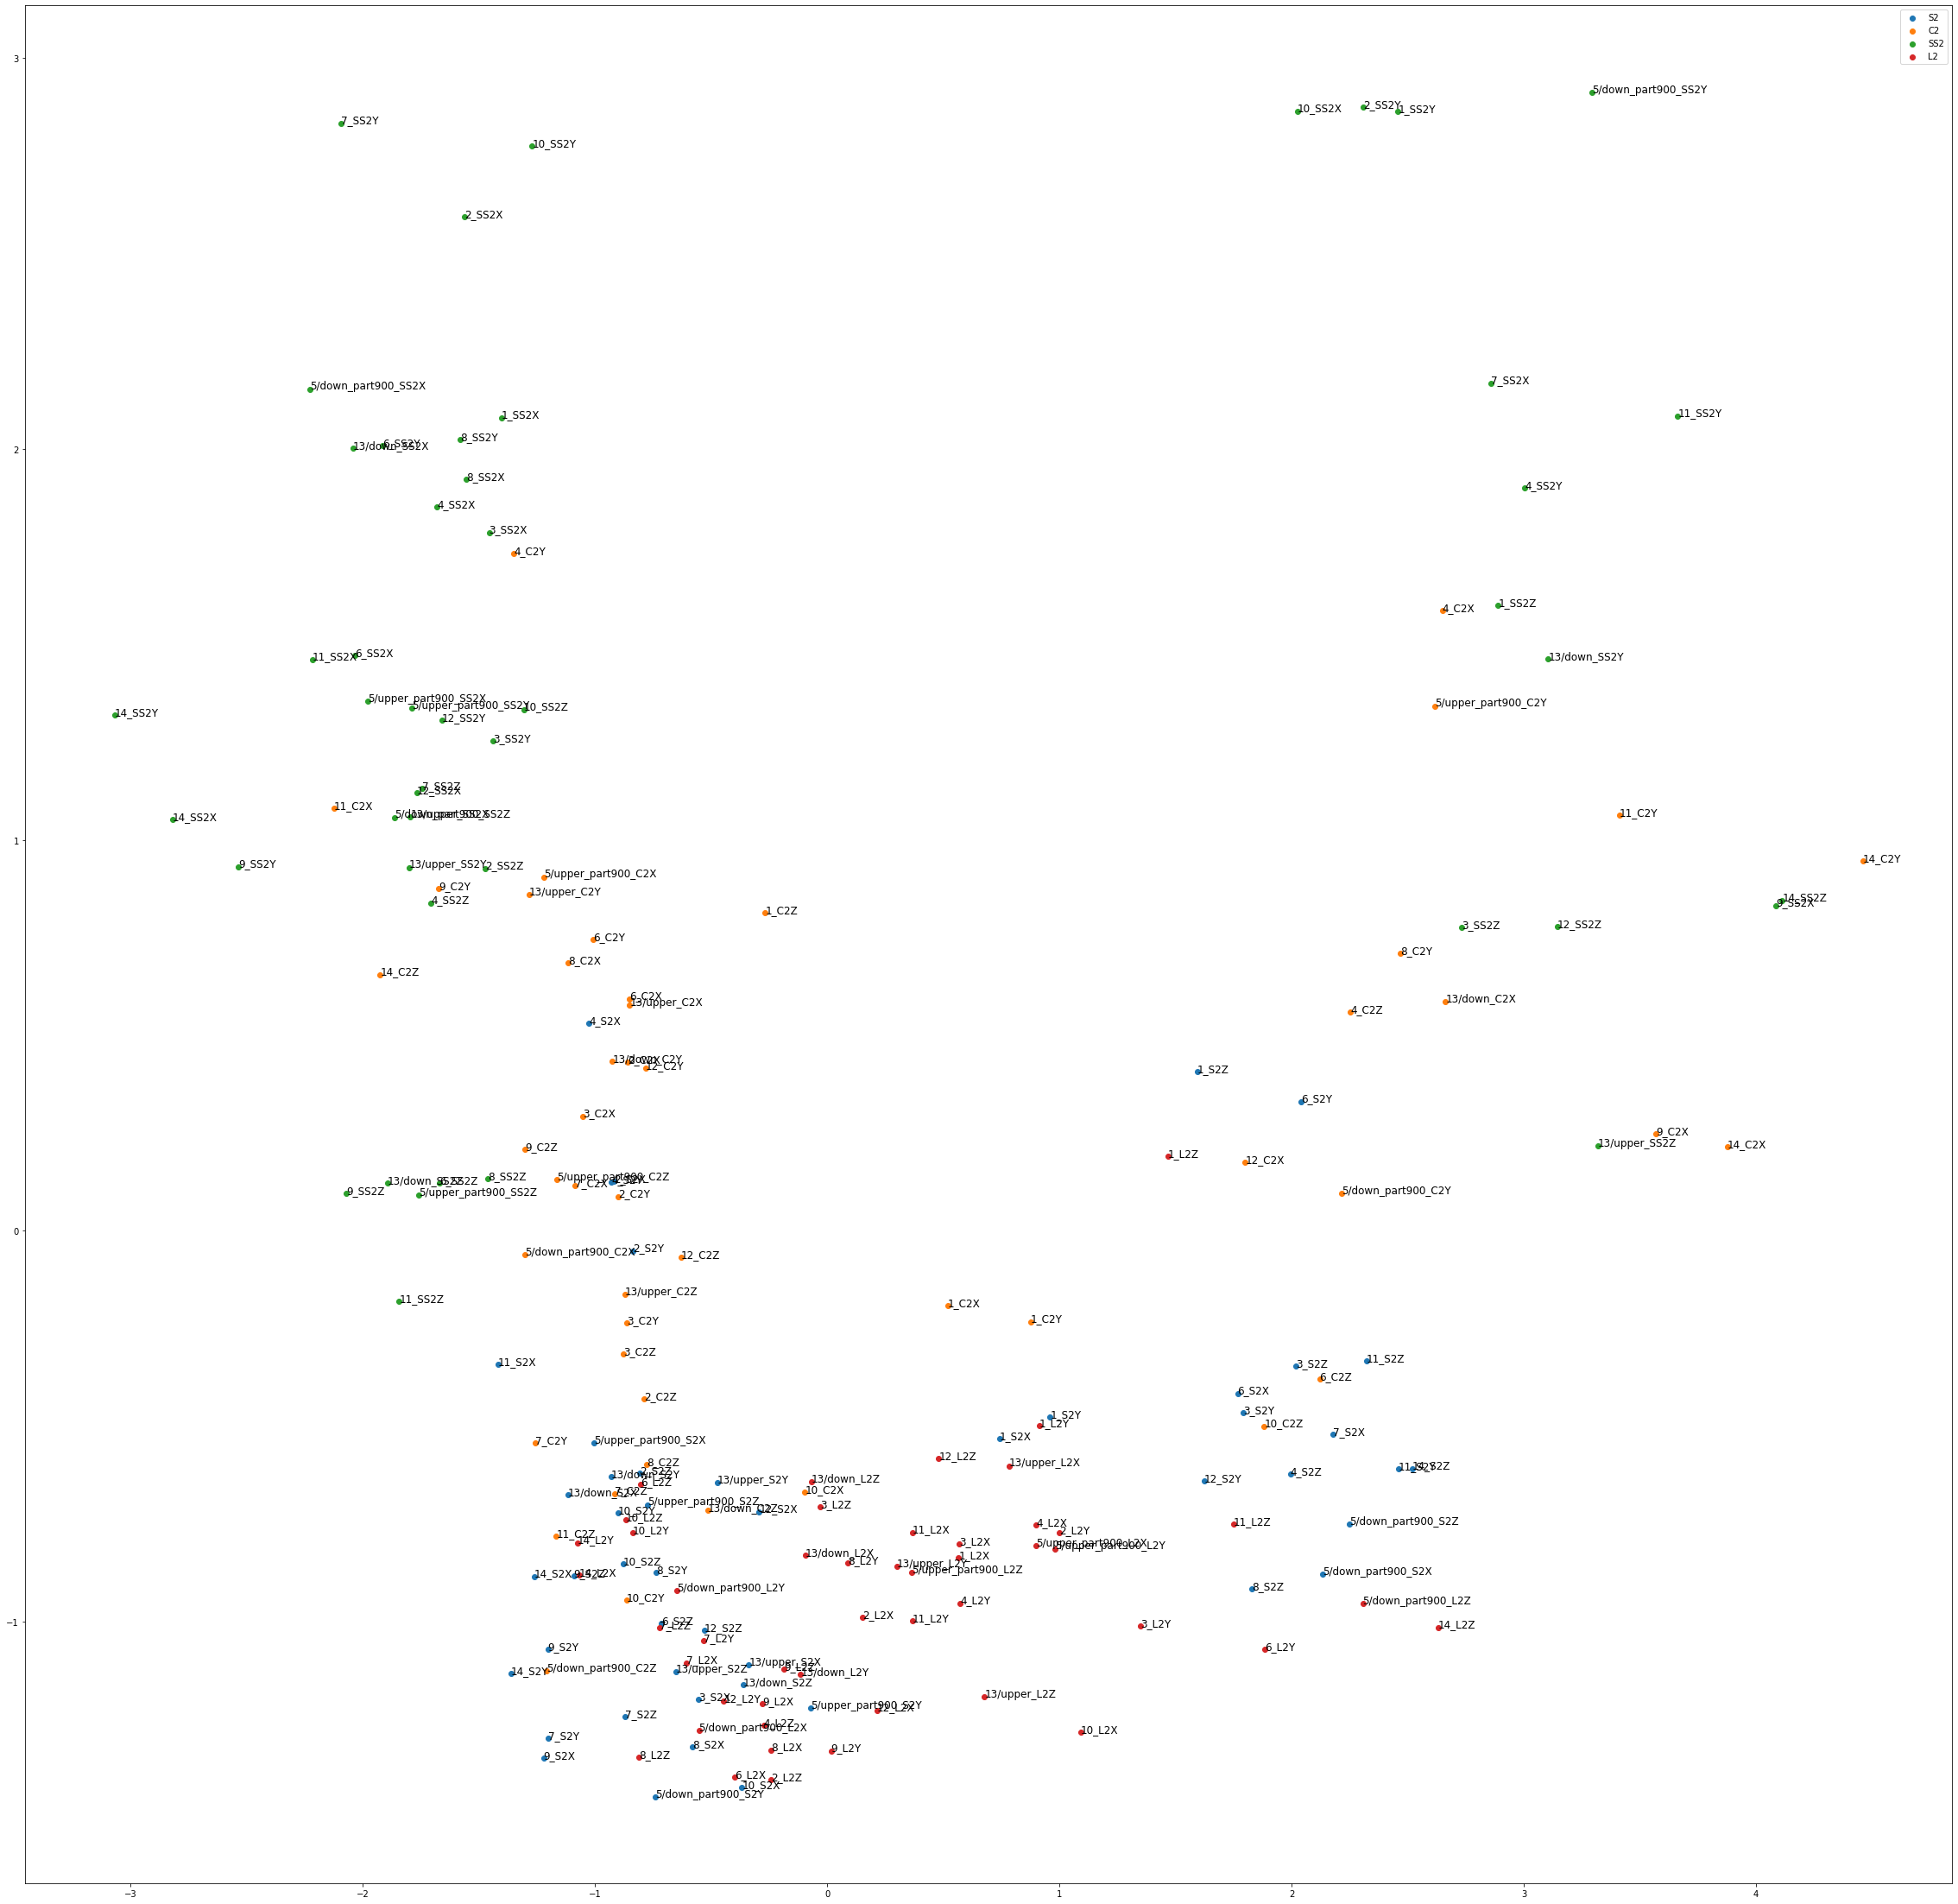

In [126]:
plt.figure(figsize=(40, 40))
for cls, idxes in classes.items():
    plt.scatter(X_embedded[idxes, 0], X_embedded[idxes, 1], label=cls)
for i, y in enumerate(Y):
    plt.annotate(y, (X_embedded[i, 0], X_embedded[i, 1]), fontsize=12)
plt.legend(loc='best')
plt.savefig('func.png')
plt.show()